<a href="https://colab.research.google.com/github/jinieo/Final-Team6/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90%ED%94%84%EC%A0%9D_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_%ED%98%9C%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/·Ñë·Ö°·Ñã·Öµ·ÑÇ·Ö•·ÜØ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/combined_dataset_cleaned.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11446 entries, 0 to 11445
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id                                           11446 non-null  int64  
 1   host_id                                      11446 non-null  int64  
 2   host_since                                   11446 non-null  object 
 3   host_response_time                           10000 non-null  object 
 4   host_response_rate                           10000 non-null  object 
 5   host_acceptance_rate                         10641 non-null  object 
 6   host_is_superhost                            11173 non-null  object 
 7   host_neighbourhood                           10530 non-null  object 
 8   host_listings_count                          11446 non-null  int64  
 9   host_total_listings_count                    11446 non-null  int64  
 10

In [ ]:
df.dropna(subset=["review_scores_value"], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

host_response_rate                             1031
host_response_time                             1031
host_neighbourhood                              739
price                                           731
host_acceptance_rate                            486
has_availability                                440
host_is_superhost                               197
last_review                                       2
first_review                                      2
reviews_per_month                                 2
minimum_maximum_nights                            1
maximum_minimum_nights                            1
maximum_maximum_nights                            1
minimum_nights_avg_ntm                            1
minimum_minimum_nights                            1
maximum_nights_avg_ntm                            1
room_type                                         0
host_verifications                                0
host_total_listings_count                         0
host_listings_count                               0
host_id                                           0
host_since                                        0
id                                                0
property_type                                     0
host_identity_verified                            0
minimum_nights                                    0
availability_60                                   0
accommodates                                      0
maximum_nights                                    0
availability_30                                   0
calendar_last_scraped                             0
availability_365                                  0
availability_90                                   0
number_of_reviews_ltm                             0
number_of_reviews_l30d                            0
review_scores_rating                              0
review_scores_accuracy                            0
number_of_reviews                                 0
review_scores_cleanliness                         0
review_scores_checkin                             0
review_scores_location                            0
review_scores_communication                       0
review_scores_value                               0
instant_bookable                                  0
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
dtype: int64

In [ ]:
df.shape

(9926, 46)

In [ ]:
# Null Í∞í ÏßëÍ≥Ñ
null_counts = df.isnull().sum()
print(null_counts)

id                                                0
host_id                                           0
host_since                                        0
host_response_time                             1031
host_response_rate                             1031
host_acceptance_rate                            486
host_is_superhost                               197
host_neighbourhood                              739
host_listings_count                               0
host_total_listings_count                         0
host_verifications                                0
host_identity_verified                            0
property_type                                     0
room_type                                         0
accommodates                                      0
price                                           731
minimum_nights                                    0
maximum_nights                                    0
minimum_minimum_nights                            1
maximum_mini

-------
#09/20 ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏãúÎèÑ

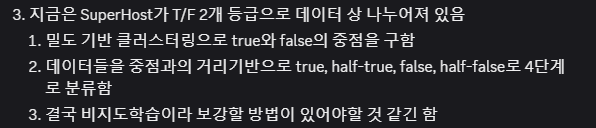

Íµ∞ÏßëÎÇòÎàÑÍ∏∞ Ï†ÑÏóê Í¥ÄÎ†® ÎÜíÏùÄ Î≥ÄÏàòÎ•º Ï∞æÏïÑÎ≥¥Î†§ Ìï®

In [ ]:
from scipy.stats import chi2_contingency

# ÏäàÌçºÌò∏Ïä§Ìä∏ Ïà´Ïûê Î≥ÄÌôò
df["host_is_superhost_num"] = df["host_is_superhost"].map({"t": 1, "f": 0})

results = {}

# 1. Ïà´ÏûêÌòï Î≥ÄÏàòÎäî ÌîºÏñ¥Ïä® ÏÉÅÍ¥Ä
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_cols:
    if col != "host_is_superhost_num":
        results[col] = abs(df[["host_is_superhost_num", col]].corr().iloc[0,1])

# 2. Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ‚Üí Cram√©r‚Äôs V
cat_cols = df.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    if col != "host_is_superhost":
        contingency = pd.crosstab(df[col], df["host_is_superhost_num"])
        chi2 = chi2_contingency(contingency)[0]
        n = contingency.sum().sum()
        k = min(contingency.shape)-1
        cramers_v = np.sqrt((chi2/n) / k)
        results[col] = cramers_v

# ÏÉÅÍ¥Ä ÎÜíÏùÄ TOP10
top10 = sorted(results.items(), key=lambda x: x[1], reverse=True)[:10]
print("SuperhostÏôÄ Í∞ÄÏû• Í¥ÄÎ†® ÎÜíÏùÄ TOP10 Î≥ÄÏàò")
for col, val in top10:
    print(f"{col}: {val:.3f}")


SuperhostÏôÄ Í∞ÄÏû• Í¥ÄÎ†® ÎÜíÏùÄ TOP10 Î≥ÄÏàò
host_since: 0.879
price: 0.705
first_review: 0.557
last_review: 0.437
review_scores_cleanliness: 0.311
number_of_reviews_ltm: 0.308
review_scores_rating: 0.306
host_response_rate: 0.285
host_acceptance_rate: 0.283
property_type: 0.267


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
#ÌïúÍ∏Ä Í∏ÄÏî® Ìè∞Ìä∏ ÏÑ§Ïπò
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

# ÌëúÏóêÏÑú ('-') ÎßàÏù¥ÎÑàÏä§ ÌëúÏãú
plt.rcParams['axes.unicode_minus'] = False

Íµ∞Ïßë ÏÉùÏÑ±ÏùÑ ÏúÑÌï¥ Ï†ÑÏ≤òÎ¶¨ Ï§ëÏóê ÏïåÍ≤å Îêú Í≤ÉÏù¥, TOPÎ≥ÄÏàò Ï§ë ÌïòÎÇòÏù∏ **property_type**Ïù¥ ÎÑàÎ¨¥ ÏûêÏûòÌïòÍ≥†, Î∂ÑÎ•ò Ï§ëÏóê
- `Room in serviced apartment`   
: Ï†ÑÏ≤¥Ïù∏ÏßÄ ÏâêÏñ¥Ïù∏ÏßÄ ÎèÖÎ¶ΩÎêúÍ±¥ÏßÄ Î∂ÑÎ•òÌïòÍ∏∞ÎèÑ Ïï†Îß§Ìï®..
- `Tiny home`  
: ÏûëÏùÄ ÏßëÏù¥ Í∑∏ÎûòÏÑú ÏâêÏñ¥Ïù∏ÏßÄ Ï†ÑÏ≤¥Ïù∏ÏßÄ Ïñ¥ÏºÄ ÏïàÎã§Îäî Í≤ÉÏûÑ?;;  

ÏúÑÏôÄ Í∞ôÏù¥ Ïï†Îß§Ìïú Í∞í Ïù¥ÏäàÍ∞Ä ÏûàÏóàÏùå, Í∑∏Îü∞Îç∞ **room_type**ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏù¥
ÍπîÎÅîÌïú 4Í∞ÄÏßÄÏùò Í∏∞Ï§ÄÏúºÎ°ú Íµ¨ÏÑ±Îê®,  
- `Entire home/apt`, `Private room`, `Hotel room`, `Shared room`  

Í∑∏ÎûòÏÑú property_typeÏùÑ Î≤ÑÎ¶¨Í≥† ÏÇ¨Ïö©ÌïòÍ∏∞Î°ú Ìï®

In [ ]:
df["property_type"].unique() #Î≥¥Îã§ÏãúÌîº ÍµâÏû•Ìûà ÏûêÏûòÌï®

array(['Entire rental unit', 'Entire serviced apartment',
       'Private room in rental unit', 'Entire condo', 'Entire loft',
       'Room in aparthotel', 'Shared room in bed and breakfast',
       'Private room in bed and breakfast', 'Room in serviced apartment',
       'Entire guest suite', 'Private room in serviced apartment',
       'Private room in home', 'Private room in condo',
       'Room in boutique hotel', 'Entire home', 'Private room in loft',
       'Private room in townhouse', 'Room in hotel', 'Entire townhouse',
       'Shared room in hostel', 'Houseboat', 'Entire bed and breakfast',
       'Private room in guest suite', 'Boat', 'Entire villa',
       'Shared room in rental unit', 'Private room in hostel',
       'Room in bed and breakfast', 'Room in hostel',
       'Private room in villa', 'Private room', 'Entire guesthouse',
       'Tiny home', 'Shared room in condo', 'Entire cottage',
       'Entire place', 'Private room in boat', 'Entire cabin',
       'Entire bunga

In [ ]:
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
df1 = df.copy()

In [ ]:
#Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
# Superhost Î≥ÄÌôò
df1["host_is_superhost_num"] = df1["host_is_superhost"].map({"t": 1, "f": 0})

# ÎÇ†ÏßúÌòï Ï≤òÎ¶¨ (ÎÖÑ Îã®ÏúÑ Î≥ÄÌôò)
df1["host_since"] = pd.to_datetime(df1["host_since"], errors="coerce")
df1["first_review"] = pd.to_datetime(df1["first_review"], errors="coerce")
df1["last_review"] = pd.to_datetime(df1["last_review"], errors="coerce")

today = pd.to_datetime("today")

df1["host_since_years"] = (today - df1["host_since"]).dt.days / 365
df1["last_review_years"] = (today - df1["last_review"]).dt.days / 365
df1["first_review_years"] = (today - df1["first_review"]).dt.days / 365


# Í∞ÄÍ≤©(price) Îã¨Îü¨Îûë ÏΩ§Îßà,nan, 0 Ï≤òÎ¶¨
df1["price"] = (
    df1["price"]
    .astype(str)
    .str.replace("[$,]", "", regex=True)   # Îã¨Îü¨/ÏΩ§Îßà Ï†úÍ±∞
    .replace(["nan", "NaN", ""], "0")      # nan, ÎπàÏπ∏ÏùÑ 0ÏúºÎ°ú
    .astype(float)
)

# ÏùëÎãµÏú®(host_response_rate) Î≥ÄÌôò (% ‚Üí float)
df1["host_response_rate"] = (
    df1["host_response_rate"].astype(str)
    .str.replace("%", "", regex=True)
    .replace("nan", "0")
    .astype(float) / 100.0
)

# ÏòàÏïΩÏàòÎùΩÏú®(host_acceptance_rate) Î≥ÄÌôò (% ‚Üí float)
df1["host_acceptance_rate"] = (
    df1["host_acceptance_rate"].astype(str)
    .str.replace("%", "", regex=True)
    .replace("nan", "0")
    .astype(float) / 100.0
)

# ÏàôÏÜåÏú†Ìòï(property_type)->(room_typeÏúºÎ°ú ÎåÄÏ≤¥Ìï®) Î≤îÏ£ºÌòï ÏõêÌï´Ïù∏ÏΩîÎî©
df1 = pd.get_dummies(df1, columns=["room_type"], drop_first=False)

#Ïù¥ÏÉÅÏπò ÌåêÎã®

ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Îãà Ïù¥ÏÉÅÏπòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏïÑÏÑú Íµ∞ÏßëÏù¥ Ïù¥ÏÉÅÌïú Ïù¥ÏäàÎ°ú Ïù¥ÏÉÅÏπò ÌåêÎã® ÏãúÏûë...  
Í≤∞Í≥ºÏ†ÅÏúºÎ°ú ÎÇ®ÏùÄ Í±¥ Ïã¨ÌîåÌïúÎç∞ Ï∞∏..ÎßéÏùÄ Ïù¥ÏäàÍ∞Ä ÏûàÏóàÏùå „Öã„Öã„Öé
„Öã„Öã„Öã..

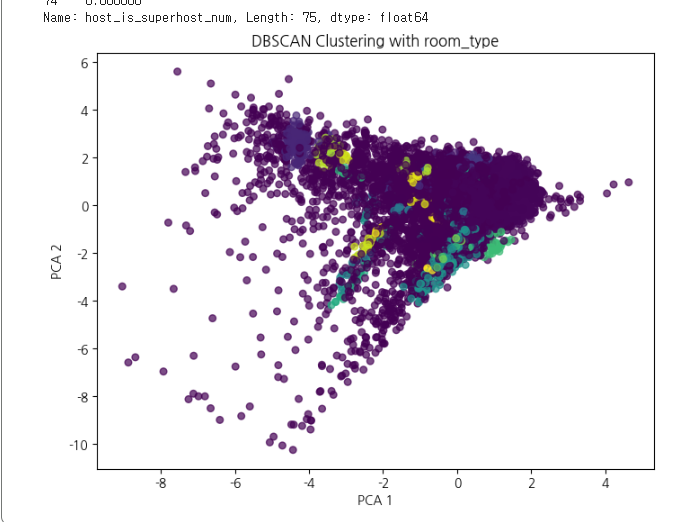

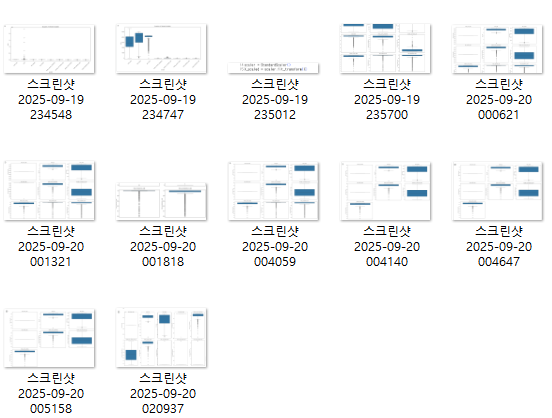

In [ ]:
#Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Î†àÏ∏†Í≥†

#Í∞ÄÍ≤©IQR ÏÇ¨Î∂ÑÏúÑÏàò
Q1 = df1["price"].quantile(0.25)
Q3 = df1["price"].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1["price"] >= Q1 - 1.5*IQR) & (df1["price"] <= Q3 + 1.5*IQR)].copy()

#Í∞ÄÍ≤© Î°úÍ∑∏Î≥ÄÌôò
df1.loc[:, "price_log"] = np.log1p(df1["price"])


#Î¶¨Î∑∞ Î°úÍ∑∏Î≥ÄÌôò
df1.loc[:, "number_of_reviews_ltm_log"] = np.log1p(df1["number_of_reviews_ltm"])

#Î¶¨Î∑∞IQR ÏÇ¨Î∂ÑÏúÑÏàò
Q1 = df1["number_of_reviews_ltm_log"].quantile(0.25)
Q3 = df1["number_of_reviews_ltm_log"].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1["number_of_reviews_ltm_log"] >= Q1 - 1.5*IQR) &
        (df1["number_of_reviews_ltm_log"] <= Q3 + 1.5*IQR)].copy()

In [ ]:
#Î™®Îç∏ ÏûÖÎ†•Í∞í Ï§ÄÎπÑ
# X Ï†ïÌï¥Ï£ºÍ∏∞
X = df1[[
    "host_since_years", "price_log", "first_review_years", "last_review_years",
    "review_scores_cleanliness", "number_of_reviews_ltm_log",
    "review_scores_rating"
    #"host_response_rate", "host_acceptance_rate" #Ïì∏Î™®ÏóÜÏùå
] + [col for col in df1.columns if col.startswith("room_type_")]].copy()

#Í≤∞Ï∏°Ï≤òÎ¶¨
X = X.fillna(0)

#Ïä§ÏºÄÏùºÎßÅ
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df1["first_review"].unique()

<DatetimeArray>
['2010-09-20 00:00:00', '2010-05-07 00:00:00', '2015-05-19 00:00:00',
 '2011-03-21 00:00:00', '2010-08-18 00:00:00', '2010-11-04 00:00:00',
 '2010-10-25 00:00:00', '2011-04-04 00:00:00', '2016-08-22 00:00:00',
 '2011-04-05 00:00:00',
 ...
 '2023-03-08 00:00:00', '2023-03-09 00:00:00', '2023-03-20 00:00:00',
 '2023-05-18 00:00:00', '2014-08-05 00:00:00', '2015-08-20 00:00:00',
 '2016-06-07 00:00:00', '2016-10-18 00:00:00', '2017-04-11 00:00:00',
 '2022-04-22 00:00:00']
Length: 2710, dtype: datetime64[ns]

In [ ]:
df1["first_review_years"].unique()

array([15.01369863, 15.38630137, 10.35068493, ...,  8.93150685,
        8.45205479,  3.41917808])

In [ ]:
len(df1["first_review_years"].unique())

2710

In [ ]:
df1["last_review_years"].unique()

array([1.76164384, 1.49589041, 1.53424658, ..., 4.08767123, 6.18082192,
       2.58356164])

In [ ]:
df1["host_since_years"].unique()

array([16.77260274, 15.41643836, 15.15616438, ...,  2.10136986,
        4.58356164,  7.45753425])

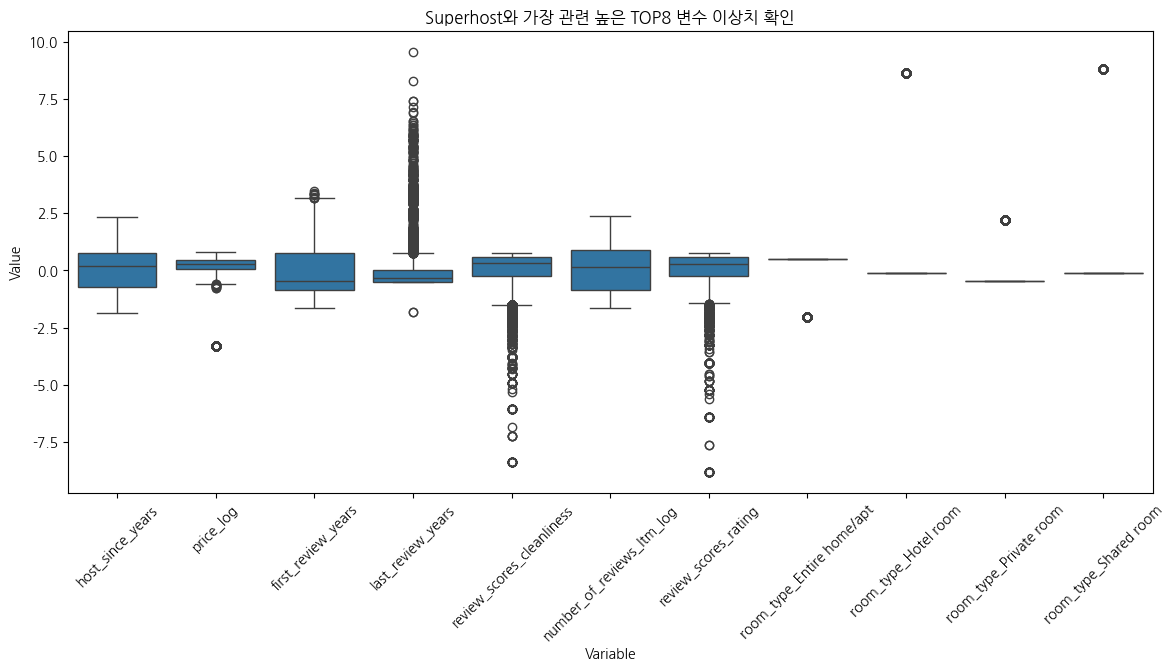

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# X_scaledÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò (Ïù¥ÎØ∏ ÌñàÎã§Î©¥ Ïù¥ Ï§Ñ ÏÉùÎûµ Í∞ÄÎä•)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# long-formatÏúºÎ°ú Î≥ÄÌôò
df_melted = X_scaled_df.melt(var_name="Variable", value_name="Value")

# Ï†ÑÏ≤¥ boxplot Ìïú Î≤àÏóê
plt.figure(figsize=(14, 6))
sns.boxplot(x="Variable", y="Value", data=df_melted)
plt.xticks(rotation=45)  # Í∞ÄÎèÖÏÑ± ÏúÑÌï¥ ÎùºÎ≤® ÌöåÏ†Ñ
plt.title("SuperhostÏôÄ Í∞ÄÏû• Í¥ÄÎ†® ÎÜíÏùÄ TOP8 Î≥ÄÏàò Ïù¥ÏÉÅÏπò ÌôïÏù∏")
plt.show()


#ÌòÑ Î∞ïÏä§ ÌîåÎ°ØÏóêÏÑú ÎÇòÎ®∏ÏßÄ Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÏßÄ ÏïäÏùÄ Ïù¥Ïú†
##1. price_log (Í∞ÄÍ≤© Î°úÍ∑∏ Î≥ÄÌôòÍ∞í)

Í∑πÎã®Ï†ÅÏúºÎ°ú ÎÜíÍ±∞ÎÇò ÎÇÆÏùÄ Í∞ÄÍ≤©ÎåÄÏùò ÏàôÏÜåÎäî Ïã§Ï†ú ÏãúÏû•ÏóêÏÑú Ï°¥Ïû¨Ìï† Ïàò ÏûàÏùå (Îü≠ÏÖîÎ¶¨ ÏàôÏÜå, Ï¥àÏ†ÄÍ∞Ä ÏàôÏÜå).

Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÌÜµÌï¥ Ïù¥ÎØ∏ Î∂ÑÌè¨Î•º ÏôÑÌôîÌñàÍ∏∞ ÎïåÎ¨∏Ïóê, ÎÇ®ÏïÑ ÏûàÎäî Í∑πÎã®Í∞íÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±ÏùÑ Î∞òÏòÅÌïòÎäî Ïã§ÏßàÏ†ÅÏù∏ Ï†ïÎ≥¥Î°ú Í∞ÑÏ£º.
Îî∞ÎùºÏÑú Ï†úÍ±∞ÌïòÏßÄ ÏïäÍ≥† Ïú†ÏßÄ.

----

##2. first_review_years (Ï≤´ Î¶¨Î∑∞ Ïù¥ÌõÑ Í≤ΩÍ≥º Ïó∞Ïàò)

Ï≤´ Î¶¨Î∑∞ ÏãúÏ†êÏù¥ Îß§Ïö∞ Ïò§ÎûòÏ†ÑÏù¥Í±∞ÎÇò ÏµúÍ∑ºÏù∏ Í≤ΩÏö∞Îäî Ìò∏Ïä§Ìä∏ Ïö¥ÏòÅ Ìå®ÌÑ¥Ïóê ÌÅ∞ Ï∞®Ïù¥Î•º Î≥¥Ïó¨Ï£ºÎäî ÌïµÏã¨ Î≥ÄÏàò.
Ïò§ÎûòÎêú Í≥ÑÏ†ïÏù¥ ÏäàÌçºÌò∏Ïä§Ìä∏Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§Îäî Ï†êÏùÑ Í≥†Î†§ÌïòÎ©¥, Í∑πÎã®Í∞íÏùÄ Ï§ëÏöîÌïú Ìï¥ÏÑù Ìè¨Ïù∏Ìä∏.

Îî∞ÎùºÏÑú Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÎåÄÏã† Í∑∏ÎåÄÎ°ú Î≥¥Ï°¥.

----


##3. last_review_years (ÎßàÏßÄÎßâ Î¶¨Î∑∞ Ïù¥ÌõÑ Í≤ΩÍ≥º Ïó∞Ïàò)

ÎßàÏßÄÎßâ Î¶¨Î∑∞ ÏãúÏ†êÏù¥ Îß§Ïö∞ Ïò§ÎûòÏ†ÑÏù¥Í±∞ÎÇò ÏµúÍ∑ºÏù∏ Í≤ΩÏö∞Îäî Ìò∏Ïä§Ìä∏Ïùò ÌôúÎèôÏÑ±ÏùÑ Ïûò Î≥¥Ïó¨Ï§å.

Ïù¥ Í∞íÏù¥ ÌÅ¨Îã§Îäî Í±¥ ÏÇ¨Ïã§ÏÉÅ Ïö¥ÏòÅÏù¥ Ï§ëÎã®Îêú Í≥ÑÏ†ïÏùº Ïàò ÏûàÍ≥†, Ïù¥Îäî ÏäàÌçºÌò∏Ïä§Ìä∏ Ïó¨Î∂ÄÏôÄ ÏßÅÏ†ë Ïó∞Í≤∞ÎêòÎäî ÌäπÏÑ±.

Îî∞ÎùºÏÑú Ïù¥ÏÉÅÏπòÍ∞Ä ÏïÑÎãàÎùº Ï§ëÏöîÌïú Ïã†Ìò∏Î°ú Í∞ÑÏ£ºÌï¥ Ïú†ÏßÄ.

----


##4. review_scores_cleanliness (Ï≤≠Í≤∞ Ï†êÏàò)

ÎåÄÎ∂ÄÎ∂Ñ Ìò∏Ïä§Ìä∏Ïùò Ï†êÏàòÍ∞Ä ÎÜíÏùÄ Íµ¨Í∞ÑÏóê Î™∞Î†§ ÏûàÏñ¥ Î∂ÑÌè¨Í∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥ê Î≥¥ÏûÑ.

ÌïòÏßÄÎßå ÎìúÎ¨ºÍ≤å ÎÇÆÏùÄ Ï≤≠Í≤∞ Ï†êÏàòÎäî Ïã§Ï†ú Í≤åÏä§Ìä∏ Í≤ΩÌóòÏùÑ Î∞òÏòÅÌïú Ï§ëÏöîÌïú Í∑πÎã® ÏÇ¨Î°Ä.

Î∂ÑÌè¨ ÌäπÏÑ±ÏÉÅ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ïãú Ïú†Ïö©Ìïú Î≥ÄÎ≥ÑÎ†•ÏùÑ ÏûÉÏùÑ Ïàò ÏûàÏñ¥ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©.

----


##5. review_scores_rating (Ï¢ÖÌï© ÌèâÏ†ê)

Ï≤≠Í≤∞ Ï†êÏàòÏôÄ Ïú†ÏÇ¨ÌïòÍ≤å ÎåÄÎ∂ÄÎ∂Ñ ÎÜíÏùÄ Ï†êÏàò(4.5~5)Ïóê ÏßëÏ§ëÎèº ÏûàÍ≥†, ÎÇÆÏùÄ ÌèâÏ†ê(3 Ïù¥Ìïò)ÏùÄ ÎìúÎ¨∏ Í∑πÎã®Í∞íÏúºÎ°ú Î≥¥ÏûÑ.

Í∑∏Îü¨ÎÇò ÎÇÆÏùÄ ÌèâÏ†êÏùÄ Ïã§Ï†úÎ°ú ÏäàÌçºÌò∏Ïä§Ìä∏ÏôÄ ÎπÑÏäàÌçºÌò∏Ïä§Ìä∏Î•º Íµ¨Î∂ÑÌïòÎäî Í∞ïÎ†•Ìïú ÏöîÏù∏Ïù¥ÎØÄÎ°ú Ï†úÍ±∞ÌïòÏßÄ ÏïäÏùå.

Îî∞ÎùºÏÑú Í∑∏ÎåÄÎ°ú Î≥¥Ï°¥.

#Î∞© Ïú†Ìòïroom type Ïì∏ÏßÄ ÎßêÏßÄ Í≥†ÎØº
Î∞© Ïú†Ìòï ÏûëÏóÖÌï† Îïå Î≤îÏ£ºÌòïÏù¥Ïñ¥ÏÑú Íµ∞ÏßëÏóêÎäî Î™ªÏì∞Í≤†Îã§Îäî Í≤ÉÏùÑ ÏïåÍ∏¥ÌñàÏúºÎÇò,
ÏùºÎã® Í∂ÅÍ∏àÌï¥ÏÑú ÏõêÏï§Ìï´ÏùÑ ÌñàÏóàÍ≥† ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Î•º ÎèåÎ†§Î≥¥Îäî Îì± Ïã§ÌóòÏùÑ Ìï¥Î≥¥ÏïòÏùå

In [ ]:
#Ïó¨Í∏∞ÏÑú Í≥†ÎØº, Í≥ºÏó∞ room typeÏùÄ ÌïÑÏöîÌï†Íπå
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# y ÌÉÄÍπÉ (ÏäàÌçºÌò∏Ïä§Ìä∏ Ïó¨Î∂Ä: 0/1)
y = df1["host_is_superhost_num"].fillna(0)

# ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ = ÎßåÎì§Ïñ¥Îëî X_scaledÏÇ¨Ïö©
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ÎûúÎç§Ìè¨Î†àÏä§Ìä∏
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.model_selection import cross_val_score
import numpy as np

# ÍµêÏ∞®Í≤ÄÏ¶ù (5-Ìè¥Îìú)
scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')

# ÏÜåÏàòÏ†ê ÏÖãÏß∏ ÏûêÎ¶¨ÍπåÏßÄ Î∞òÏò¨Î¶º
scores_rounded = np.round(scores, 3)

print("ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ:", scores_rounded)
print("ÌèâÍ∑† Ï†ïÌôïÎèÑ: {:.3f} ¬± {:.3f}".format(np.mean(scores), np.std(scores)))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1141
         1.0       0.80      0.71      0.75       719

    accuracy                           0.82      1860
   macro avg       0.81      0.80      0.81      1860
weighted avg       0.82      0.82      0.82      1860

ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: [0.758 0.746 0.616 0.531 0.649]
ÌèâÍ∑† Ï†ïÌôïÎèÑ: 0.660 ¬± 0.084


ÍµêÏ∞®Í≤ÄÏ¶ù Í≤∞Í≥º, ÌèâÍ∑† Ï†ïÌôïÎèÑ ÏïΩ 0.66ÏúºÎ°ú Ï§ëÍ∞Ñ ÏàòÏ§Ä.

Ïó¨Í∏∞ÏÑú room_type Î≥ÄÏàò Ìè¨Ìï® Ïó¨Î∂ÄÍ∞Ä ÏÑ±Îä•Ïóê ÌÅ∞ Í∏∞Ïó¨Î•º ÌïòÏßÄ ÏïäÏùåÏùÑ ÌôïÏù∏
ÌùëÌùë..Í∑∏ÎûòÏÑú ÎπºÍ∏∞Î°ú Ìï®

#room_typeÏùÑ ÎπºÍ≥† ÎèåÎ†§Î≥¥Í∏∞_Îç∞Ïù¥ÌÑ∞ Ìå®ÌÑ¥ ÌôïÏù∏Ï∞® ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

In [ ]:
X2 = X.drop(columns=[col for col in X.columns if col.startswith("room_type_")])
X2_scaled = scaler.fit_transform(X2)

   dbscan_no_room  superhost_ratio
0              -1         0.054945
1               0         0.421135
2               1         0.222059
3               2         0.166667
4               3         0.000000


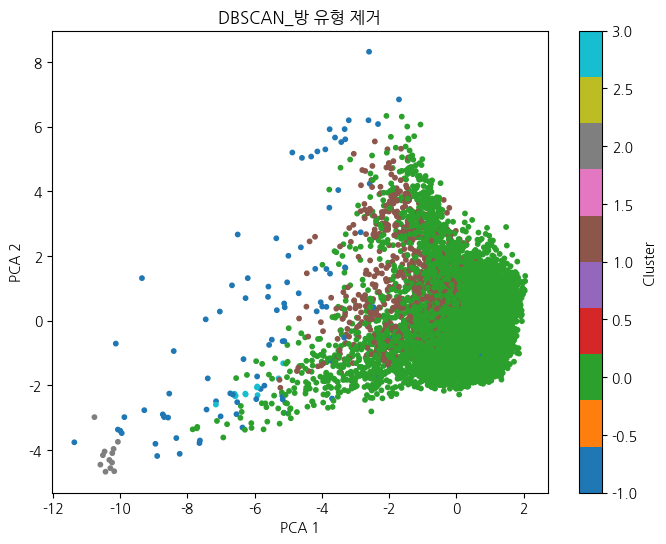

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# DBSCAN Ïã§Ìñâ (eps Í∞íÏùÄ Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÏóê Îî∞Îùº Ï°∞Ï†ï)
dbscan = DBSCAN(eps=1.5, min_samples=10)
df1["dbscan_no_room"] = dbscan.fit_predict(X2_scaled)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Superhost ÎπÑÏú®
dbscan_stats = (
    df1.groupby("dbscan_no_room")["host_is_superhost_num"]
    .mean()
    .reset_index()
    .rename(columns={"host_is_superhost_num": "superhost_ratio"})
)
print(dbscan_stats)

# PCA 2D ÏãúÍ∞ÅÌôî
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=df1["dbscan_no_room"], cmap="tab10", s=10)
plt.title("DBSCAN_Î∞© Ïú†Ìòï Ï†úÍ±∞")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


#DBSCANÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏù¥ Ïûò ÎêòÏßÄ ÏïäÏïòÏùå, Îî∞ÎùºÏÑú KMeansÎ°ú Î≥ÄÍ≤ΩÌï®

host_is_superhost_num       0.0       1.0
cluster_no_room                          
0                      0.575426  0.424574
1                      0.838975  0.161025
2                      0.486672  0.513328
3                      0.958264  0.041736


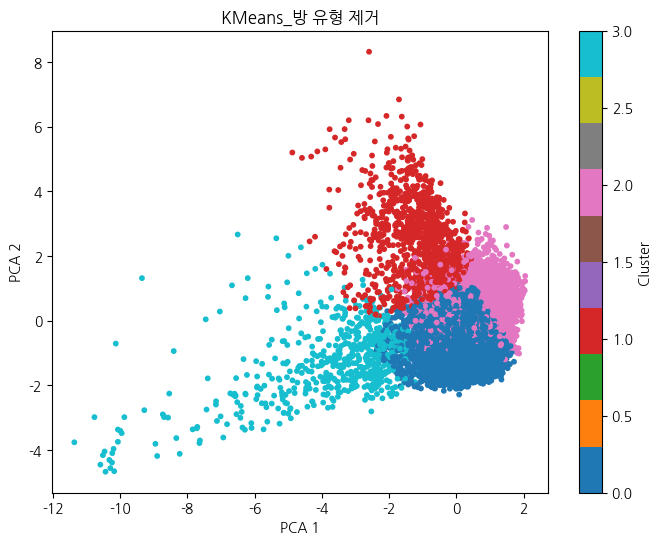

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (Ïòà: 4Í∞ú Íµ∞Ïßë)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df1["cluster_no_room"] = kmeans.fit_predict(X2_scaled)

# 2. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Superhost ÎπÑÏú® ÌôïÏù∏
print(pd.crosstab(df1["cluster_no_room"], df1["host_is_superhost_num"], normalize="index"))

# 3. PCA Ï∞®ÏõêÏ∂ïÏÜåÎ°ú ÏãúÍ∞ÅÌôî
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=df1["cluster_no_room"], cmap="tab10", s=10)
plt.title("KMeans_Î∞© Ïú†Ìòï Ï†úÍ±∞")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# -----------------------------
# 1. PCA (3Ï∞®Ïõê Ï∂ïÏÜå)
# -----------------------------
pca = PCA(n_components=3)
X2_pca = pca.fit_transform(X2_scaled)

pca_df = pd.DataFrame(X2_pca, columns=["PCA1", "PCA2", "PCA3"])
pca_df["cluster"] = df1["cluster_no_room"]

# -----------------------------
# 2. 3D Scatter (Ïù∏ÌÑ∞ÎûôÌã∞Î∏å)
# -----------------------------
fig = px.scatter_3d(
    pca_df,
    x="PCA1", y="PCA2", z="PCA3",
    color="cluster",
    opacity=0.5,                # Ìà¨Î™ÖÎèÑ (Í≤πÏπ® ÏôÑÌôî)
    title="KMeans Clustering (PCA 3D Interactive)"
)

# Ï†ê ÌÅ¨Í∏∞ Ï§ÑÏù¥Í∏∞
fig.update_traces(marker=dict(size=2))

# -----------------------------
# 3. Í∑∏ÎûòÌîÑ Ïã§Ìñâ
# -----------------------------
fig.show()


In [ ]:
cluster_means = df1.groupby("cluster_no_room")[X2.columns].mean()
cluster_means

host_since_years  price_log  first_review_years  \
cluster_no_room                                                    
0                        5.948817   7.403514            2.712387   
1                        9.780997   4.815455            7.167010   
2                       11.117964   7.639115            7.065948   
3                        6.198662   6.158573            3.070085   

                 last_review_years  review_scores_cleanliness  \
cluster_no_room                                                 
0                         1.785336                   4.767563   
1                         4.514309                   4.767066   
2                         1.681597                   4.726119   
3                         2.259711                   3.507677   

                 number_of_reviews_ltm_log  review_scores_rating  
cluster_no_room                                                   
0                                 2.345789              4.782407  
1                                 0.179622              4.757093  
2                                 3.114730              4.744771  
3                                 1.189404              3.595228

#ÏÇ¨Ïö©Ìïú Î≥ÄÏàò Îã§Ïãú Ïñ∏Í∏â

Ìò∏Ïä§Ìä∏ Îì±Î°ùÏùº `host_since`

Í∞ÄÍ≤© `price`

Ï≤´ Î¶¨Î∑∞ ÎÇ†Ïßú  `first_review`

ÎßàÏßÄÎßâ Î¶¨Î∑∞ ÎÇ†Ïßú `last_review`

Ï≤≠Í≤∞ÎèÑ ÌèâÏ†ê `review_scores_cleanliness`

ÏßÄÎÇú 12Í∞úÏõî Î¶¨Î∑∞ Ïàò `number_of_reviews_ltm`

Ï†ÑÏ≤¥ ÌèâÏ†ê `review_scores_rating`


# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏßëÎã® ÏöîÏïΩ

Cluster 2 ‚Üí Í∞ÄÏû• ÏäàÌçºÌò∏Ïä§Ìä∏Ïóê Í∞ÄÍπåÏö¥ÎìØ: Í≤ΩÌóò Ïò§ÎûòÎê®, Í∞ÄÍ≤©ÎåÄ ÎÜíÏùå, Î¶¨Î∑∞ ÎßéÍ≥† ÏµúÍ∑ºÏóêÎèÑ ÌôúÎèô ÌôúÎ∞ú, ÌèâÏ†ê ÎÜíÏùå.

Cluster 1 ‚Üí ÏùÄÌá¥Ìïú Ìò∏Ïä§Ìä∏: Í≤ΩÎ†•ÏùÄ Í∏∏ÏßÄÎßå ÏµúÍ∑º ÌôúÎèôÏù¥ Í±∞Ïùò ÏóÜÏùå.

Cluster 0 ‚Üí ÌèâÍ∑†Ï†ÅÏù∏ Ìò∏Ïä§Ìä∏: Í∞ÄÍ≤©ÎåÄÎäî ÎÜíÏùÄ Ìé∏, ÏµúÍ∑º ÌôúÎèô ÌôúÎ∞ú, ÌèâÏ†ê ÎÜíÏùå.

Cluster 3 ‚Üí Î¨∏Ï†ú Ìò∏Ïä§Ìä∏„Öã„Öã: ÌèâÏ†êÏù¥ ÎÇÆÍ≥† Î¶¨Î∑∞ÎèÑ Ï†ÅÏùÄ Ïã†Î¢∞ÎèÑ ÎÇÆÏùÄ Ìò∏Ïä§Ìä∏.

Cluster 0

host_since_years: 5.9 ‚Üí Ìò∏Ïä§Ìä∏ Í≤ΩÌóò Î≥¥ÌÜµ

price_log: 7.40 ‚Üí Í∞ÄÍ≤© ÎÜíÏùå

first_review_years: 2.71, last_review_years: 1.78 ‚Üí Î¶¨Î∑∞Í∞Ä ÏµúÍ∑ºÏóê Î™∞Î†§ÏûàÏùå

number_of_reviews_ltm_log: 2.35 ‚Üí ÏµúÍ∑º 12Í∞úÏõî Î¶¨Î∑∞ Ïàò ÎßéÏùå

review_scores_rating: 4.78 ‚Üí ÌèâÏ†ê Îß§Ïö∞ ÎÜíÏùå
üëâ Í∞ÄÍ≤©ÎåÄÍ∞Ä ÎÜíÏùÄ ÏàôÏÜå + ÏµúÍ∑º Î¶¨Î∑∞ ÌôúÎèô ÎßéÍ≥† ÌèâÏ†êÎèÑ Ï¢ãÏùÄ Ï§ëÍ∏â Í≤ΩÌóòÏûê Ìò∏Ïä§Ìä∏ Í∑∏Î£π

----

Cluster 1

host_since_years: 9.78 ‚Üí Ìò∏Ïä§Ìä∏ Í≤ΩÌóò Ïò§ÎûòÎê®

price_log: 4.81 ‚Üí Í∞ÄÍ≤© ÎÇÆÏùå

first_review_years: 7.17, last_review_years: 4.51 ‚Üí Î¶¨Î∑∞ Ïó≠ÏÇ¨Í∞Ä Ïò§ÎûòÎê®

number_of_reviews_ltm_log: 0.18 ‚Üí ÏµúÍ∑º Î¶¨Î∑∞ Í±∞Ïùò ÏóÜÏùå

review_scores_rating: 4.76 ‚Üí ÌèâÏ†ê ÎÜíÏùå
üëâ Í≤ΩÎ†•ÏùÄ Í∏∏ÏßÄÎßå ÌôúÎèôÏù¥ Ï§ÑÏñ¥Îì† Ï†ÄÍ∞Ä ÏàôÏÜå Í∑∏Î£π (ÏäàÌçºÌò∏Ïä§Ìä∏ ÎπÑÏú® ÎÇÆÏùÑ Í∞ÄÎä•ÏÑ± ÎÜíÏùå)


----

Cluster 2

host_since_years: 11.1 ‚Üí Í∞ÄÏû• Ïò§ÎûòÎêú Ìò∏Ïä§Ìä∏

price_log: 7.63 ‚Üí Í∞ÄÍ≤© Îß§Ïö∞ ÎÜíÏùå

first_review_years: 7.06, last_review_years: 1.68 ‚Üí Î¶¨Î∑∞ Ïó≠ÏÇ¨Îäî Í∏∏ÏßÄÎßå ÏµúÍ∑º Î¶¨Î∑∞ ÏûàÏùå

number_of_reviews_ltm_log: 3.11 ‚Üí ÏµúÍ∑º Î¶¨Î∑∞ ÌôúÎèô ÎßéÏùå

review_scores_rating: 4.74 ‚Üí ÌèâÏ†ê ÎÜíÏùå
üëâ Í≤ΩÎ†• Í∏∏Í≥† Í≥†Í∞Ä ÏàôÏÜå Ïö¥ÏòÅ + ÏµúÍ∑ºÏóêÎèÑ ÌôúÎ∞úÌûà ÌôúÎèôÏ§ëÏù∏ ÌååÏõå ÏäàÌçºÌò∏Ïä§Ìä∏ Í∞ÄÎä•ÏÑ± ÎÜíÏùÄ Í∑∏Î£π

----

Cluster 3

host_since_years: 6.2 ‚Üí Ï§ëÍ∞Ñ Ï†ïÎèÑ Í≤ΩÌóò

price_log: 6.16 ‚Üí Í∞ÄÍ≤© Ï§ëÍ∞Ñ

first_review_years: 3.07, last_review_years: 2.26 ‚Üí Î¶¨Î∑∞ ÏµúÍ∑º

number_of_reviews_ltm_log: 1.18 ‚Üí Î¶¨Î∑∞ Ï†ÅÏùå

review_scores_rating: 3.59 ‚Üí ÌèâÏ†ê ÎÇÆÏùå
üëâ Í≤ΩÌóòÎèÑ Ï†ÅÍ≥† ÌèâÏ†ê ÎÇÆÏùÄ ÏàôÏÜå ‚Üí Ïã†Î¢∞ÎèÑ ÎÇÆÍ≥† ÏäàÌçºÌò∏Ïä§Ìä∏ÏôÄ Í±∞Î¶¨Í∞Ä Î®º Í∑∏Î£π

#ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Superhost ÎπÑÏú® Í≥ÑÏÇ∞

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------
# 1. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Superhost ÎπÑÏú® Í≥ÑÏÇ∞
# -----------------------------
cluster_stats = (
    df1.groupby("cluster_no_room")["host_is_superhost_num"]
    .mean()
    .reset_index()
    .rename(columns={"host_is_superhost_num": "superhost_ratio"})
)

# -----------------------------
# 2. 4Îã®Í≥Ñ Î†àÏù¥Î∏îÎßÅ Ìï®Ïàò
# -----------------------------
def assign_label(ratio):
    if ratio >= 0.75:
        return "true"
    elif ratio >= 0.5:
        return "half-true"
    elif ratio >= 0.25:
        return "half-false"
    else:
        return "false"

#ÏäàÌçºÌò∏Ïä§Ìä∏ 4Îã®Í≥Ñ
cluster_stats["superhost_label_4"] = cluster_stats["superhost_ratio"].apply(assign_label)

# -----------------------------
# 3. ÏõêÎ≥∏ df1Ïóê Î≥ëÌï©
# -----------------------------
df1 = df1.merge(cluster_stats[["cluster_no_room", "superhost_label_4"]],
                on="cluster_no_room", how="left")

print(cluster_stats)
print(df1["superhost_label_4"].value_counts())

   cluster_no_room  superhost_ratio superhost_label_4
0                0         0.424574        half-false
1                1         0.161025             false
2                2         0.513328         half-true
3                3         0.041736             false
superhost_label_4
half-false    4034
half-true     3515
false         1748
Name: count, dtype: int64


In [ ]:
cluster_stats

cluster_no_room  superhost_ratio superhost_label_4
0                0         0.424574        half-false
1                1         0.161025             false
2                2         0.513328         half-true
3                3         0.041736             false

In [ ]:
df1["superhost_label_4"].value_counts()

superhost_label_4
half-false    4034
half-true     3515
false         1748
Name: count, dtype: int64

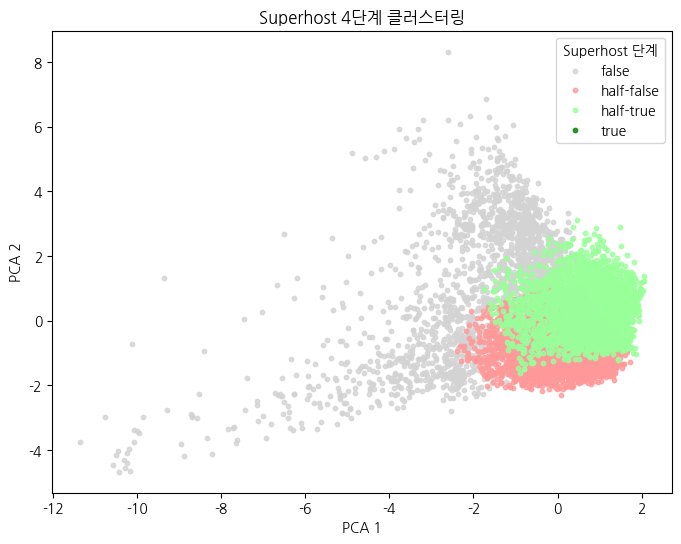

In [ ]:
import matplotlib.pyplot as plt

# ÏÉâÏÉÅ Îß§Ìïë (false=ÌöåÏÉâ, half-false=Ïó∞Ï†ÅÏÉâ, half-true=Ïó∞ÎÖπÏÉâ, true=ÎÖπÏÉâ)
color_map = {
    "false": "lightgray",
    "half-false": "#ff9999",   # Ïó∞Ìïú Ï†ÅÏÉâ
    "half-true": "#99ff99",    # Ïó∞Ìïú ÎÖπÏÉâ
    "true": "green"
}

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,6))
for label, color in color_map.items():
    mask = df1["superhost_label_4"] == label
    plt.scatter(
        X2_pca[mask, 0],   # Ï≤´ Î≤àÏß∏ Ï£ºÏÑ±Î∂Ñ
        X2_pca[mask, 1],   # Îëê Î≤àÏß∏ Ï£ºÏÑ±Î∂Ñ
        c=color, label=label, s=10, alpha=0.8
    )

plt.title("Superhost 4Îã®Í≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Superhost Îã®Í≥Ñ")
plt.show()


#Superhost 4Îã®Í≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏûëÏóÖ Í≤∞Í≥º
ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏûëÏóÖÏùÑ ÌÜµÌï¥ TrueÍπåÏßÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Í∞ïÎ†•Ìïú Í≤ÉÏùÄ ÏóÜÏßÄÎßå half-trueÍπåÏßÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨Ìï®ÏùÑ Ïïå Ïàò ÏûàÏóàÏùå

In [ ]:
# 1. Ï£ºÏöî Î≥ÄÏàòÎì§Ïùò Í∑∏Î£πÎ≥Ñ ÌèâÍ∑†
label_means = df1.groupby("superhost_label_4")[X2.columns].mean()

# Î≥¥Í∏∞ Ï¢ãÍ≤å round
label_means = label_means.round(3)

label_means

host_since_years  price_log  first_review_years  \
superhost_label_4                                                    
false                         8.476      5.305               5.674   
half-false                    5.949      7.404               2.712   
half-true                    11.118      7.639               7.066   

                   last_review_years  review_scores_cleanliness  \
superhost_label_4                                                 
false                          3.693                      4.308   
half-false                     1.785                      4.768   
half-true                      1.682                      4.726   

                   number_of_reviews_ltm_log  review_scores_rating  
superhost_label_4                                                   
false                                  0.548                 4.334  
half-false                             2.346                 4.782  
half-true                              3.115                 4.745

review_scores_cleanlinessÏùò Ï∞®Ïù¥Îäî ÎØ∏ÎØ∏Ìï¥ÏÑú ÏòÅÌñ•Ïù¥ Î∂ÄÏ°±ÌïòÎã§Í≥† ÌåêÎã®

#Í∑∏Î£πÎ≥Ñ Î≥ÄÏàò ÌäπÏÑ± ÏöîÏïΩ

##false Í∑∏Î£π

host_since_years: 8.5ÎÖÑ ‚Üí Í≥ÑÏ†ïÏùÄ Ïò§ÎûòÎêòÏóàÏßÄÎßå,

price_log: 5.3 ‚Üí Í∞ÄÍ≤©ÎåÄ ÎÇÆÏùå

number_of_reviews_ltm_log: 0.55 ‚Üí ÏµúÍ∑º 12Í∞úÏõî Î¶¨Î∑∞ Í±∞Ïùò ÏóÜÏùå

review_scores_rating: 4.33 ‚Üí ÌèâÏ†ê ÎÇÆÏùå
‚Üí Ïò§ÎûòÎêú Ìò∏Ïä§Ìä∏ÏßÄÎßå ÌôúÎèô Ï†ÅÍ≥† ÌèâÏ†ê ÎÇÆÏïÑ Superhost ÎπÑÏú®Ïù¥ ÎÇÆÏùÄ ÏßëÎã®.

##half-false Í∑∏Î£π

host_since_years: 5.9ÎÖÑ ‚Üí Ïö¥ÏòÅÍ∏∞Í∞Ñ ÏßßÏùÄ Ìé∏

price_log: 7.4 ‚Üí ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í∞ÄÍ≤©ÎåÄ ÎÜíÏùå

number_of_reviews_ltm_log: 2.35 ‚Üí Î¶¨Î∑∞Îäî ÍΩ§ ÏûàÏùå

review_scores_rating: 4.78 ‚Üí ÌèâÏ†ê Í∞ÄÏû• ÎÜíÏùå
‚Üí Ïã†Í∑úÏßÄÎßå Í∞ÄÍ≤©ÎåÄ ÏûàÍ≥† ÌèâÏ†ê/Î¶¨Î∑∞Í∞Ä Í¥úÏ∞ÆÏùÄÌé∏Ïù¥Îùº Superhost Í∞ÄÎä•ÏÑ±Ïù¥ Ï§ëÍ∞Ñ Ï†ïÎèÑÏù∏ ÏßëÎã®.

##half-true Í∑∏Î£π

host_since_years: 11.1ÎÖÑ ‚Üí Í∞ÄÏû• Ïò§ÎûòÎêú Ìò∏Ïä§Ìä∏

price_log: 7.6 ‚Üí Í∞ÄÍ≤©ÎåÄÎèÑ ÎÜíÏùå

number_of_reviews_ltm_log: 3.1 ‚Üí Î¶¨Î∑∞ ÌôúÎ∞ú

review_scores_rating: 4.75 ‚Üí ÌèâÏ†ê ÎÜíÏùå
‚Üí Ïò§ÎûòÎêòÍ≥† Í∞ÄÍ≤©ÎèÑ ÎÜíÏúºÎ©∞ ÌôúÎèô ÌôúÎ∞úÌï¥ SuperhostÏóê Í∞ÄÍπåÏö¥ ÏßëÎã®.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X2_scaled, df1["cluster_no_room"])
importances = pd.Series(rf.feature_importances_, index=X2.columns).sort_values(ascending=False)
print(importances)

first_review_years           0.281018
host_since_years             0.236096
number_of_reviews_ltm_log    0.143367
last_review_years            0.109917
review_scores_rating         0.094658
review_scores_cleanliness    0.088876
price_log                    0.046068
dtype: float64


ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ‚Üí

* Ïò§ÎûòÎêòÏóàÏßÄÎßå ÌôúÎèô Ï†ÅÏùÄ Í∑∏Î£πfalse Í∑∏Î£π
* Ïã†Í∑úÏßÄÎßå ÌèâÏ†ê Ï¢ãÏùÄ Í∑∏Î£π half-false Í∑∏Î£π
* Ïò§ÎûòÎêòÏóàÏßÄÎßå ÌôúÎèôÏù¥ ÌôúÎ∞úÌï®  half-true Í∑∏Î£π


Î≥ÄÏàò Í∏∞Ïó¨ÎèÑ ‚Üí Íµ∞Ïßë Íµ¨Î∂ÑÏóê ÏûàÏñ¥ Í∞ÄÏû• ÌÅ∞ ÏöîÏù∏ÏùÄ Ï≤´ Î¶¨Î∑∞ ÏãúÏ†êÍ≥º Ïö¥ÏòÅÍ∏∞Í∞ÑÏù¥ÏóàÏùå.  
ÏµúÍ∑º Î¶¨Î∑∞ ÏàòÏôÄ ÏµúÍ∑º Î¶¨Î∑∞ ÏãúÏ†êÎèÑ Ï£ºÏöîÌïú Í∏∞Ï§ÄÏù¥ ÎêòÏóàÏùå.  

----

Ïù∏ÏÇ¨Ïù¥Ìä∏ ‚Üí ÏäàÌçºÌò∏Ïä§Ìä∏ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ Í∑∏Î£πÏùÄ Ïò§ÎûòÎêú Í≥ÑÏ†ï + ÌôúÎ∞úÌïú Î¶¨Î∑∞ ÌôúÎèôÏù¥ Îí∑Î∞õÏπ®Îêú Í≤ΩÏö∞ÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå.

#ÎπÑÏßÄÎèÑ ÌïôÏäµÏùÑ Ïñ¥ÎñªÍ≤å Î≥¥ÏôÑÌï†Íπå..?

In [ ]:
pd.crosstab(df1["superhost_label_4"], df1["host_is_superhost"], normalize="index")

host_is_superhost         f         t
superhost_label_4                    
false              0.881206  0.118794
half-false         0.575426  0.424574
half-true          0.486672  0.513328

In [ ]:
pd.DataFrame(X2_scaled, columns=X2.columns).isna().sum()

host_since_years             0
price_log                    0
first_review_years           0
last_review_years            0
review_scores_cleanliness    0
number_of_reviews_ltm_log    0
review_scores_rating         0
dtype: int64

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# --- ÌÉÄÍ≤ü Ï†ïÏùò (Í≤∞Ï∏°Ïπò Ï†úÍ±∞) ---
y = df1["host_is_superhost_num"]
mask = y.notna()
X_clean = X2_scaled[mask]
y_clean = y[mask]

# --- Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ---
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

# --- XGBoost Î™®Îç∏ Ï†ïÏùò ---
xgb_model = XGBClassifier(
    eval_metric="logloss",
    random_state=42,
)

# --- ÌïôÏäµ ---
xgb_model.fit(X_train, y_train)

# --- ÏòàÏ∏° ---
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# --- Í≤∞Í≥º Ï∂úÎ†• ---
print("===== XGBoost =====")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

===== XGBoost =====
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1091
         1.0       0.83      0.78      0.81       732

    accuracy                           0.85      1823
   macro avg       0.85      0.84      0.84      1823
weighted avg       0.85      0.85      0.85      1823

Confusion Matrix:
 [[977 114]
 [160 572]]
Accuracy: 0.85
ROC-AUC: 0.914


ÏûÖÎ†•(X):
* host_since_years
* price_log
* first_review_years
* last_review_years
* review_scores_cleanliness
* number_of_reviews_ltm_log
* review_scores_rating

Ï†ïÎãµ(y): host_is_superhost_num (0=ÎπÑÏäàÌçºÌò∏Ïä§Ìä∏, 1=ÏäàÌçºÌò∏Ïä§Ìä∏)

ÏßÄÎèÑÌïôÏäµ (XGBoost)Î•º ÌôúÏö©Ìï¥ÏÑú
Ïã§Ï†ú ÏäàÌçºÌò∏Ïä§Ìä∏ ÎùºÎ≤®Î°ú Í≤ÄÏ¶ùÌï¥ Î≥¥Îãà,
Î™®Îç∏Ïù¥ 85% Ï†ïÌôïÎèÑÎ°ú ÏòàÏ∏° Í∞ÄÎä•ÌñàÍ≥†, ROC-AUC 0.914Î°ú Í∞ïÌïú Î∂ÑÎ•òÎ†•ÏùÑ Î≥¥ÏòÄÎã§.
Î≥¥ÏôÑ Í≤∞Î°†: Îî∞ÎùºÏÑú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóêÏÑú Ï†ïÏùòÌïú half-true Í∑∏Î£πÏùÄ Ïã§Ï†ú ÏäàÌçºÌò∏Ïä§Ìä∏ ÏßëÎã®Í≥º Ïú†ÏÇ¨ÌïòÍ≤å ÎÇòÌÉÄÎÇ¨ÏúºÎ©∞,Ïò§ÎûòÎêú Ïö¥ÏòÅÍ∏∞Í∞ÑÍ≥º ÌôúÎ∞úÌïú Î¶¨Î∑∞ ÌôúÎèôÏù¥ ÌïµÏã¨ ÏöîÏù∏ÏûÑÏùÑ ÏñëÏ™Ω Î∂ÑÏÑùÏóêÏÑú Î™®Îëê ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.